In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('gdrive/My Drive/hotel_bookings.csv')
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
if data.duplicated().any():
    print(data.duplicated().sum(),"has duplicate data.")
else:
    print("no duplicate.")

31994 has duplicate data.


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [ ]:
data['children']=data['children'].fillna(0)

<Axes: xlabel='country', ylabel='count'>

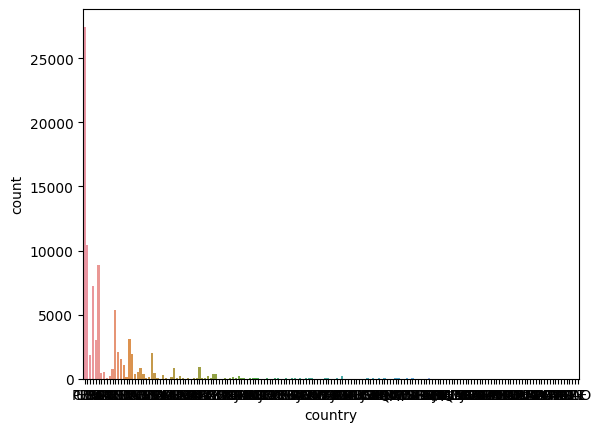

In [ ]:
sn.countplot(x=data['country'])

In [ ]:
data['country']=data['country'].fillna("Unknown")

<ipython-input-10-b615466c3c9d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


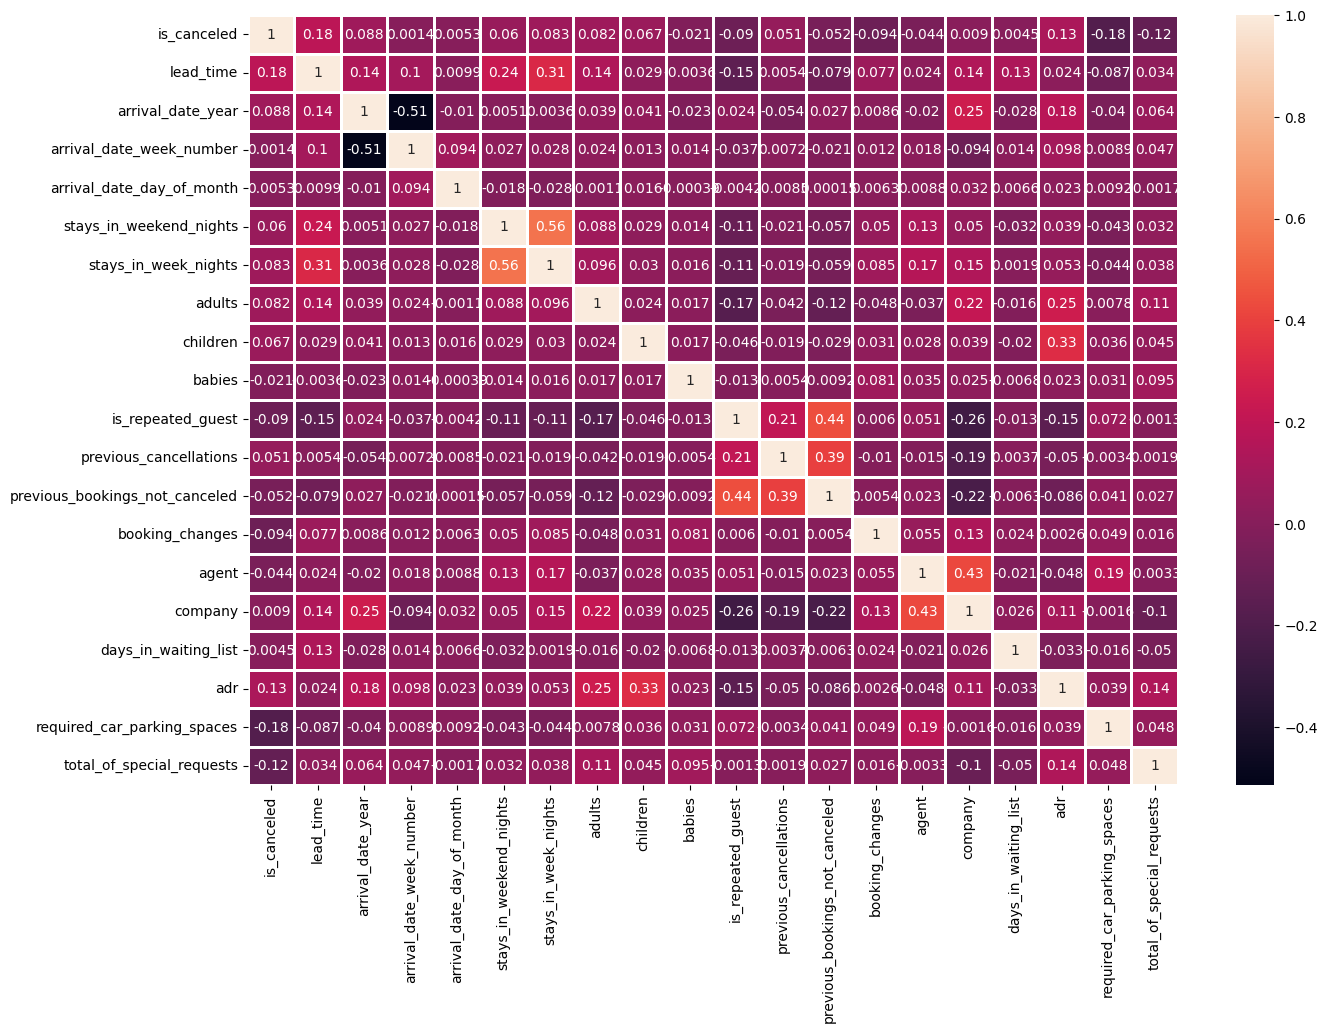

In [ ]:
plt.figure(figsize = (15, 10))

corr = data.corr()
sn.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
correlation = data.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

<ipython-input-11-29c7160d27c3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()['is_canceled'].abs().sort_values(ascending = False)


is_canceled                       1.000000
lead_time                         0.184806
required_car_parking_spaces       0.184206
adr                               0.127986
total_of_special_requests         0.120545
booking_changes                   0.093644
is_repeated_guest                 0.089643
arrival_date_year                 0.088030
stays_in_week_nights              0.082928
adults                            0.081816
children                          0.067369
stays_in_weekend_nights           0.060191
previous_bookings_not_canceled    0.052154
previous_cancellations            0.051468
agent                             0.044359
babies                            0.020543
company                           0.009040
arrival_date_day_of_month         0.005328
days_in_waiting_list              0.004464
arrival_date_week_number          0.001443
Name: is_canceled, dtype: float64

In [ ]:
data['agent']=data['agent'].fillna(0)

In [ ]:
data['company']=data['company'].fillna(0)

In [ ]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
X = data.drop(['is_canceled'],axis=1)
y = data['is_canceled']

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(conf)
print(clf_report)

[[15739   210]
 [  449  5451]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15949
           1       0.96      0.92      0.94      5900

    accuracy                           0.97     21849
   macro avg       0.97      0.96      0.96     21849
weighted avg       0.97      0.97      0.97     21849



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)
print(conf)
print(clf_report)

[[13710  2239]
 [ 3660  2240]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82     15949
           1       0.50      0.38      0.43      5900

    accuracy                           0.73     21849
   macro avg       0.64      0.62      0.63     21849
weighted avg       0.71      0.73      0.72     21849



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
conf = confusion_matrix(y_test, y_pred_dt)
clf_report = classification_report(y_test, y_pred_dt)
print(conf)
print(clf_report)

[[15949     0]
 [    0  5900]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15949
           1       1.00      1.00      1.00      5900

    accuracy                           1.00     21849
   macro avg       1.00      1.00      1.00     21849
weighted avg       1.00      1.00      1.00     21849



In [ ]:
newx=X_train
newxtest=X_test

In [ ]:
newx['lead_time'] = np.log(newx['lead_time'] + 1)
newx['arrival_date_week_number'] = np.log(newx['arrival_date_week_number'] + 1)
newx['arrival_date_day_of_month'] = np.log(newx['arrival_date_day_of_month'] + 1)

newxtest['lead_time'] = np.log(newxtest['lead_time'] + 1)
newxtest['arrival_date_week_number'] = np.log(newxtest['arrival_date_week_number'] + 1)
newxtest['arrival_date_day_of_month'] = np.log(newxtest['arrival_date_day_of_month'] + 1)

In [ ]:
lr = LogisticRegression()
lr.fit(newx, y_train)
newy_pred_lr = lr.predict(newxtest)
conf = confusion_matrix(y_test, newy_pred_lr)
clf_report = classification_report(y_test, newy_pred_lr)
print(conf)
print(clf_report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[15203   570]
 [  984  5092]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     15773
           1       0.90      0.84      0.87      6076

    accuracy                           0.93     21849
   macro avg       0.92      0.90      0.91     21849
weighted avg       0.93      0.93      0.93     21849



In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(newx, y_train)
newy_pred_knn = knn.predict(newxtest)
conf = confusion_matrix(y_test, newy_pred_knn)
clf_report = classification_report(y_test, newy_pred_knn)
print(conf)
print(clf_report)

[[14749  1024]
 [ 2010  4066]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     15773
           1       0.80      0.67      0.73      6076

    accuracy                           0.86     21849
   macro avg       0.84      0.80      0.82     21849
weighted avg       0.86      0.86      0.86     21849



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(newx, y_train)
newy_pred_dt = dt.predict(newxtest)
conf = confusion_matrix(y_test, newy_pred_dt)
clf_report = classification_report(y_test, newy_pred_dt)
print(conf)
print(clf_report)

[[15773     0]
 [    0  6076]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15773
           1       1.00      1.00      1.00      6076

    accuracy                           1.00     21849
   macro avg       1.00      1.00      1.00     21849
weighted avg       1.00      1.00      1.00     21849



In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(newx)
newxpca = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principalComponents = pca.transform(newxtest)
newxtestpca = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(newxpca, y_train)
py_pred_knn = knn.predict(newxtestpca)
conf = confusion_matrix(y_test, py_pred_knn)
clf_report = classification_report(y_test, py_pred_knn)
print(conf)
print(clf_report)

[[13513  2260]
 [ 3804  2272]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     15773
           1       0.50      0.37      0.43      6076

    accuracy                           0.72     21849
   macro avg       0.64      0.62      0.62     21849
weighted avg       0.70      0.72      0.71     21849



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(newxpca, y_train)
py_pred_dt = dt.predict(newxtestpca)
conf = confusion_matrix(y_test, py_pred_dt)
clf_report = classification_report(y_test, py_pred_dt)
print(conf)
print(clf_report)

[[12246  3527]
 [ 3398  2678]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     15773
           1       0.43      0.44      0.44      6076

    accuracy                           0.68     21849
   macro avg       0.61      0.61      0.61     21849
weighted avg       0.69      0.68      0.68     21849



In [ ]:
lda = LDA(n_components=1)
newxlda = lda.fit_transform(newx, y_train)
newxtestlda = lda.transform(newxtest)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(newxlda, y_train)
ly_pred_knn = knn.predict(newxtestlda)
conf = confusion_matrix(y_test, ly_pred_knn)
clf_report = classification_report(y_test, ly_pred_knn)
print(conf)
print(clf_report)

[[15050   723]
 [ 1399  4677]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     15773
           1       0.87      0.77      0.82      6076

    accuracy                           0.90     21849
   macro avg       0.89      0.86      0.87     21849
weighted avg       0.90      0.90      0.90     21849



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(newxlda, y_train)
ly_pred_dt = dt.predict(newxtestlda)
conf = confusion_matrix(y_test, ly_pred_dt)
clf_report = classification_report(y_test, ly_pred_dt)
print(conf)
print(clf_report)

[[14350  1423]
 [ 1424  4652]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     15773
           1       0.77      0.77      0.77      6076

    accuracy                           0.87     21849
   macro avg       0.84      0.84      0.84     21849
weighted avg       0.87      0.87      0.87     21849



In [ ]:
seltrain=pd.concat([newx["lead_time"],newx["required_car_parking_spaces"],newx["adr"],newx["total_of_special_requests"],newx["booking_changes"]],axis=1)
seltest=pd.concat([newxtest["lead_time"],newxtest["required_car_parking_spaces"],newxtest["adr"],newxtest["total_of_special_requests"],newxtest["booking_changes"]],axis=1)

In [ ]:
lr = LogisticRegression()
lr.fit(seltrain, y_train)
sy_pred_lr = lr.predict(seltest)
conf = confusion_matrix(y_test, sy_pred_lr)
clf_report = classification_report(y_test, sy_pred_lr)
print(conf)
print(clf_report)

[[14838   935]
 [ 4626  1450]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84     15773
           1       0.61      0.24      0.34      6076

    accuracy                           0.75     21849
   macro avg       0.69      0.59      0.59     21849
weighted avg       0.72      0.75      0.70     21849



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(seltrain, y_train)
sy_pred_knn = knn.predict(seltest)
conf = confusion_matrix(y_test, sy_pred_knn)
clf_report = classification_report(y_test, sy_pred_knn)
print(conf)
print(clf_report)

[[13448  2325]
 [ 3475  2601]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     15773
           1       0.53      0.43      0.47      6076

    accuracy                           0.73     21849
   macro avg       0.66      0.64      0.65     21849
weighted avg       0.72      0.73      0.73     21849



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(seltrain, y_train)
sy_pred_dt = dt.predict(seltest)
conf = confusion_matrix(y_test, sy_pred_dt)
clf_report = classification_report(y_test, sy_pred_dt)
print(conf)
print(clf_report)

[[12926  2847]
 [ 3510  2566]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80     15773
           1       0.47      0.42      0.45      6076

    accuracy                           0.71     21849
   macro avg       0.63      0.62      0.62     21849
weighted avg       0.70      0.71      0.70     21849



In [ ]:
sel = VarianceThreshold(threshold=(0.2))
svtrain=sel.fit_transform(newx)
svtest=sel.transform(newxtest)

In [ ]:
lr = LogisticRegression()
lr.fit(svtrain, y_train)
svy_pred_lr = lr.predict(svtest)
conf = confusion_matrix(y_test, svy_pred_lr)
clf_report = classification_report(y_test, svy_pred_lr)
print(conf)
print(clf_report)

[[14536  1237]
 [ 3631  2445]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86     15773
           1       0.66      0.40      0.50      6076

    accuracy                           0.78     21849
   macro avg       0.73      0.66      0.68     21849
weighted avg       0.76      0.78      0.76     21849



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(svtrain, y_train)
svy_pred_dt = dt.predict(svtest)
conf = confusion_matrix(y_test, svy_pred_dt)
clf_report = classification_report(y_test, svy_pred_dt)
print(conf)
print(clf_report)

[[13241  2532]
 [ 2448  3628]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     15773
           1       0.59      0.60      0.59      6076

    accuracy                           0.77     21849
   macro avg       0.72      0.72      0.72     21849
weighted avg       0.77      0.77      0.77     21849

